In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls
from FNNLS import FNNLSa

# set random seed for reproducing test
np.random.seed(777)

# nu, sample decay rate, frequency-domain
nu     = np.linspace(0.005, 0.15, 600)
del_nu = nu[1]-nu[0]

# t, time-domain
t = np.linspace(0.0, 80.0, 1000)

# Exponential transform matrix, converts decay rate to time-domain
R = np.exp(-np.outer(t, nu))

# Distribution of rates, P(nu). Or coefficients of each rate
rate_id    = [50,400]
weights    = np.zeros_like(nu)

true_rates = [nu[k]*1.0 for k in rate_id]

print("True rates at : {0:.5f}, {1:.5f}".format(*true_rates))

# weights for each rate
weights[rate_id[0]] = 0.6
weights[rate_id[1]] = 0.4

# generate some noisy data
noise_g = np.random.randn(t.size) * 0.002
Yobs    = R @ weights + noise_g

True rates at : 0.01710, 0.10183


In [3]:
# for NNLS
RtR = R.T @ R
Rtb = R.T @ Yobs

# solve for decay rates
%timeit nu_solved, _ = nnls(R, Yobs)


41 ms ± 358 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%timeit nu_solved_fnnls, _ = FNNLSa(RtR, Rtb)

9.73 ms ± 51.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


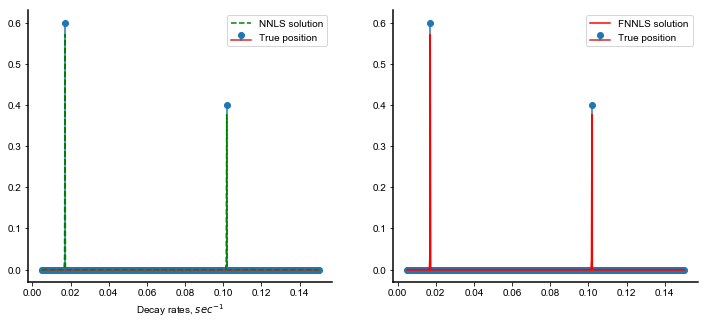

In [10]:
# overlay plots
fig, (freqax, freqax2) = plt.subplots(1,2, figsize=(12,5)) 

freqax.stem(nu, weights, label='True position')
freqax.plot(nu, nu_solved, 'g--', label='NNLS solution')
freqax.set_xlabel("Decay rates, $sec^{-1}$")
freqax.legend()

freqax2.stem(nu, weights, label='True position')
freqax2.plot(nu, nu_solved_fnnls, 'r-', label='FNNLS solution')
freqax.set_xlabel("Decay rates, $sec^{-1}$")
freqax2.legend()
